In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading train and test dataset #

df = pd.read_csv('sample_submission.csv')
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [128]:
train_data = train_data.drop(['MasVnrType'], axis=1)
train_data.isna().sum()[train_data.isna().sum()>0].sort_values(ascending=False)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
Electrical         1
dtype: int64

In [3]:
# Total 19 NAN columns #

In [129]:
############### Numerical Features ################################
numerical_features = [ f for f in train_data.columns if train_data[f].isnull().sum() > 1 and train_data[f].dtypes != 'O']
numerical_features

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [130]:
for i in numerical_features:
    median_val = train_data[i].median()
    train_data[i].fillna(median_val,inplace = True)

In [131]:
train_data.isna().sum()[train_data.isna().sum()>0].sort_values(ascending=False)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
Electrical         1
dtype: int64

In [132]:
############### categorical Features ################################

categorical_features = [ f for f in train_data.columns if train_data[f].isnull().sum() >= 1 and train_data[f].dtypes == 'O']
categorical_features

['Alley',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [133]:
for i in categorical_features:
    train_data[i] = train_data[i].fillna('missing')
    
train_data[categorical_features].head()

,Alley,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature
0,missing,Gd,TA,No,GLQ,Unf,SBrkr,missing,Attchd,RFn,TA,TA,missing,missing,missing
1,missing,Gd,TA,Gd,ALQ,Unf,SBrkr,TA,Attchd,RFn,TA,TA,missing,missing,missing
2,missing,Gd,TA,Mn,GLQ,Unf,SBrkr,TA,Attchd,RFn,TA,TA,missing,missing,missing
3,missing,TA,Gd,No,ALQ,Unf,SBrkr,Gd,Detchd,Unf,TA,TA,missing,missing,missing
4,missing,Gd,TA,Av,GLQ,Unf,SBrkr,TA,Attchd,RFn,TA,TA,missing,missing,missing


In [134]:
train_data.isnull().sum().any()

False

In [135]:
# Temporal Variables/ Datetime Variables
Yr_features = [features for features in train_data.columns if 'Yr' in features or 'Year' in features]
print('number of Temporal Variables:', len(Yr_features))
train_data[Yr_features].head()

number of Temporal Variables: 4


,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,2003,2003,2003.0,2008
1,1976,1976,1976.0,2007
2,2001,2002,2001.0,2008
3,1915,1970,1998.0,2006
4,2000,2000,2000.0,2008


In [136]:
for i in ['YearBuilt','YearRemodAdd','GarageYrBlt']:
    train_data[i] = train_data['YrSold'] - train_data[i]
    
train_data[Yr_features].head()

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,5,5,5.0,2008
1,31,31,31.0,2007
2,7,6,7.0,2008
3,91,36,8.0,2006
4,8,8,8.0,2008


C:\Users\Chaitanya Mhetre\AppData\Local\Temp\ipykernel_32504\2531378461.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_data['SalePrice'])


<Axes: xlabel='SalePrice', ylabel='Density'>

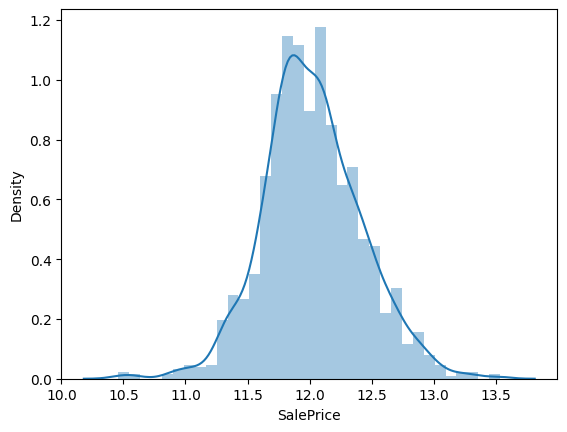

In [137]:
import numpy as np
num_features=['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']

for feature in num_features:
    train_data[feature]=np.log(train_data[feature])
    
sns.distplot(train_data['SalePrice'])

In [138]:
train_data.shape

(1460, 80)

In [139]:
len(categorical_features)

15

In [140]:
train_data.head(25)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,4.174387,9.041922,Pave,missing,Reg,Lvl,AllPub,...,0,missing,missing,missing,0,2,2008,WD,Normal,12.247694
1,2,20,RL,4.382027,9.169518,Pave,missing,Reg,Lvl,AllPub,...,0,missing,missing,missing,0,5,2007,WD,Normal,12.109011
2,3,60,RL,4.219508,9.328123,Pave,missing,IR1,Lvl,AllPub,...,0,missing,missing,missing,0,9,2008,WD,Normal,12.317167
3,4,70,RL,4.094345,9.164296,Pave,missing,IR1,Lvl,AllPub,...,0,missing,missing,missing,0,2,2006,WD,Abnorml,11.849398
4,5,60,RL,4.430817,9.565214,Pave,missing,IR1,Lvl,AllPub,...,0,missing,missing,missing,0,12,2008,WD,Normal,12.429216
5,6,50,RL,4.442651,9.554993,Pave,missing,IR1,Lvl,AllPub,...,0,missing,MnPrv,Shed,700,10,2009,WD,Normal,11.870600
6,7,20,RL,4.317488,9.218705,Pave,missing,Reg,Lvl,AllPub,...,0,missing,missing,missing,0,8,2007,WD,Normal,12.634603
7,8,60,RL,4.234107,9.247829,Pave,missing,IR1,Lvl,AllPub,...,0,missing,missing,Shed,350,11,2009,WD,Normal,12.206073
8,9,50,RM,3.931826,8.719317,Pave,missing,Reg,Lvl,AllPub,...,0,missing,missing,missing,0,4,2008,WD,Abnorml,11.774520
9,10,190,RL,3.912023,8.911934,Pave,missing,Reg,Lvl,AllPub,...,0,missing,missing,missing,0,1,2008,WD,Normal,11.678440


In [141]:
categorical_features1 = [ f for f in train_data.columns if train_data[f].dtypes == 'O']
for feature in categorical_features1:
    labels_ordered=train_data.groupby([feature])['SalePrice'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    train_data[feature]=train_data[feature].map(labels_ordered)

In [142]:
train_data.head(25)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,4.174387,9.041922,1,2,0,1,1,...,0,0,4,2,0,2,2008,4,4,12.247694
1,2,20,3,4.382027,9.169518,1,2,0,1,1,...,0,0,4,2,0,5,2007,4,4,12.109011
2,3,60,3,4.219508,9.328123,1,2,1,1,1,...,0,0,4,2,0,9,2008,4,4,12.317167
3,4,70,3,4.094345,9.164296,1,2,1,1,1,...,0,0,4,2,0,2,2006,4,1,11.849398
4,5,60,3,4.430817,9.565214,1,2,1,1,1,...,0,0,4,2,0,12,2008,4,4,12.429216
5,6,50,3,4.442651,9.554993,1,2,1,1,1,...,0,0,2,1,700,10,2009,4,4,11.870600
6,7,20,3,4.317488,9.218705,1,2,0,1,1,...,0,0,4,2,0,8,2007,4,4,12.634603
7,8,60,3,4.234107,9.247829,1,2,1,1,1,...,0,0,4,1,350,11,2009,4,4,12.206073
8,9,50,1,3.931826,8.719317,1,2,0,1,1,...,0,0,4,2,0,4,2008,4,1,11.774520
9,10,190,3,3.912023,8.911934,1,2,0,1,1,...,0,0,4,2,0,1,2008,4,4,11.678440


In [143]:
scaling_feature=[feature for feature in train_data.columns if feature not in ['Id','SalePrice'] ]
len(scaling_feature)

78

In [144]:
# checking for coreelation #

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

correlation(train_data,0.75)

{'1stFlrSF',
 'Exterior2nd',
 'FireplaceQu',
 'GarageArea',
 'GarageCond',
 'GarageYrBlt',
 'PoolQC',
 'SalePrice',
 'TotRmsAbvGrd'}

In [145]:
train_data = train_data.drop(['1stFlrSF' ,'Exterior2nd',
 'FireplaceQu',
 'GarageArea',
 'GarageCond',
 'GarageYrBlt',
 'PoolQC',
 'TotRmsAbvGrd'], axis=1)

In [146]:
scaling_feature=[feature for feature in train_data.columns if feature not in ['Id','SalePrice'] ]
len(scaling_feature)

70

In [147]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(train_data[scaling_feature])

MinMaxScaler()

In [148]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,4.174387,9.041922,1,2,0,1,1,...,0,0,4,2,0,2,2008,4,4,12.247694
1,2,20,3,4.382027,9.169518,1,2,0,1,1,...,0,0,4,2,0,5,2007,4,4,12.109011
2,3,60,3,4.219508,9.328123,1,2,1,1,1,...,0,0,4,2,0,9,2008,4,4,12.317167
3,4,70,3,4.094345,9.164296,1,2,1,1,1,...,0,0,4,2,0,2,2006,4,1,11.849398
4,5,60,3,4.430817,9.565214,1,2,1,1,1,...,0,0,4,2,0,12,2008,4,4,12.429216


In [149]:
scaler.transform(train_data[scaling_feature])

array([[0.23529412, 0.75      , 0.41820812, ..., 0.5       , 0.5       ,
        0.8       ],
       [0.        , 0.75      , 0.49506375, ..., 0.25      , 0.5       ,
        0.8       ],
       [0.23529412, 0.75      , 0.434909  , ..., 0.5       , 0.5       ,
        0.8       ],
       ...,
       [0.29411765, 0.75      , 0.42385922, ..., 1.        , 0.5       ,
        0.8       ],
       [0.        , 0.75      , 0.434909  , ..., 1.        , 0.5       ,
        0.8       ],
       [0.        , 0.75      , 0.47117546, ..., 0.5       , 0.5       ,
        0.8       ]])

In [150]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,4.174387,9.041922,1,2,0,1,1,...,0,0,4,2,0,2,2008,4,4,12.247694
1,2,20,3,4.382027,9.169518,1,2,0,1,1,...,0,0,4,2,0,5,2007,4,4,12.109011
2,3,60,3,4.219508,9.328123,1,2,1,1,1,...,0,0,4,2,0,9,2008,4,4,12.317167
3,4,70,3,4.094345,9.164296,1,2,1,1,1,...,0,0,4,2,0,2,2006,4,1,11.849398
4,5,60,3,4.430817,9.565214,1,2,1,1,1,...,0,0,4,2,0,12,2008,4,4,12.429216


In [151]:
# transform the train and test set, and add on the Id and SalePrice variables
data = pd.concat([train_data[['Id', 'SalePrice']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(train_data[scaling_feature]), columns=scaling_feature)],
                    axis=1)

In [152]:
data.head()

,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,12.247694,0.235294,0.75,0.418208,0.366344,1.0,1.0,0.000000,0.333333,...,0.0,0.0,0.0,1.0,0.5,0.0,0.090909,0.50,0.5,0.8
1,2,12.109011,0.000000,0.75,0.495064,0.391317,1.0,1.0,0.000000,0.333333,...,0.0,0.0,0.0,1.0,0.5,0.0,0.363636,0.25,0.5,0.8
2,3,12.317167,0.235294,0.75,0.434909,0.422359,1.0,1.0,0.333333,0.333333,...,0.0,0.0,0.0,1.0,0.5,0.0,0.727273,0.50,0.5,0.8
3,4,11.849398,0.294118,0.75,0.388581,0.390295,1.0,1.0,0.333333,0.333333,...,0.0,0.0,0.0,1.0,0.5,0.0,0.090909,0.00,0.5,0.2
4,5,12.429216,0.235294,0.75,0.513123,0.468761,1.0,1.0,0.333333,0.333333,...,0.0,0.0,0.0,1.0,0.5,0.0,1.000000,0.50,0.5,0.8


In [154]:
data.to_csv('final_data.csv', index=False)

### Linear Regression

In [155]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

X = data.drop(['Id','SalePrice'],axis =1)
y = data['SalePrice']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


lm.fit(X_train,y_train)
pred = lm.predict(X_test)
print("test data Score:",lm.score(X_test,y_test))
print("train data Score:" , lm.score(X_train,y_train))
from sklearn.metrics import r2_score
re = r2_score(y_test, pred)
print("r2 square value",re)

from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

test data Score: 0.9063341792256496
train data Score: 0.9057091438598718
r2 square value 0.9063341792256496
MAE: 0.08928113308307173
MSE: 0.015890047285365645
RMSE: 0.12605573087077654


### Random Forest

In [158]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [10,15,30,50]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [5, 10,15, 20]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 50, 80, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 50, 100, 200, 500,
                                                         800]},
                   random_state=42, verbose=2)

In [159]:
rf_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 20,
 'bootstrap': False}

In [162]:
rf_best = RandomForestRegressor(n_estimators= 200,
 min_samples_split= 2,
 min_samples_leaf= 1,
 max_features= 'sqrt',
 max_depth= 20,
 bootstrap= False)

In [163]:
rf_best.fit(X_train,y_train)
rf_y_pred_best = rf_best.predict(X_test)

print("test data Score:", rf_best.score(X_test,y_test))
print("train data Score:" , rf_best.score(X_train,y_train))
from sklearn.metrics import r2_score
re = r2_score(y_test, rf_y_pred_best)
print("r2 sqyuare value",re)

from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, rf_y_pred_best))
print('MSE:', metrics.mean_squared_error(y_test, rf_y_pred_best))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rf_y_pred_best)))

test data Score: 0.890922613521741
train data Score: 0.9999964579920362
r2 sqyuare value 0.890922613521741
MAE: 0.08807782919175733
MSE: 0.018504560303583818
RMSE: 0.13603146806376756


C:\Users\Chaitanya Mhetre\AppData\Local\Temp\ipykernel_32504\213329637.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rf_y_pred_best)


<Axes: ylabel='Density'>

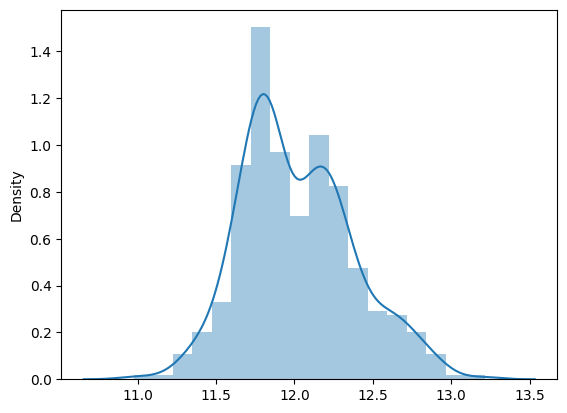

In [164]:
sns.distplot(rf_y_pred_best)

C:\Users\Chaitanya Mhetre\AppData\Local\Temp\ipykernel_32504\2957397977.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test)


<Axes: xlabel='SalePrice', ylabel='Density'>

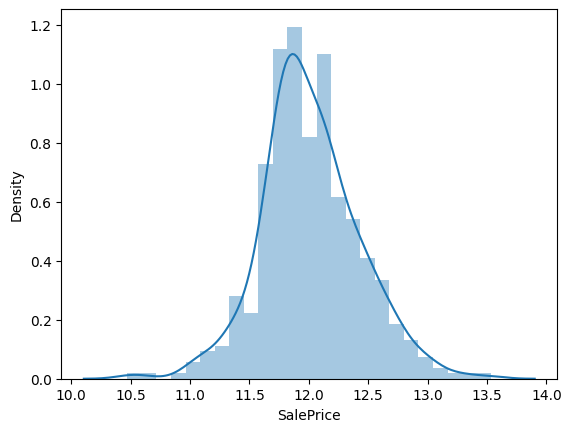

In [165]:
sns.distplot(y_test)